In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
# Load data
#cats_dir = '/home/erick/Desktop/mcc20201/deepl/dlgit/datasets/PetImages/Cat'
#dogs_dir = '/home/erick/Desktop/mcc20201/deepl/dlgit/datasets/PetImages/Dog'

train_dir = '/home/erick/Desktop/mcc20201/deepl/dlgit/datasets/PetImages/train/'
val_dir = '/home/erick/Desktop/mcc20201/deepl/dlgit/datasets/PetImages/val/'
train_cats_dir = '/home/erick/Desktop/mcc20201/deepl/dlgit/datasets/PetImages/train/trainCats'
train_dogs_dir = '/home/erick/Desktop/mcc20201/deepl/dlgit/datasets/PetImages/train/trainDogs'
validation_cats_dir = '/home/erick/Desktop/mcc20201/deepl/dlgit/datasets/PetImages/val/validationCats/'
validation_dogs_dir = '/home/erick/Desktop/mcc20201/deepl/dlgit/datasets/PetImages/val/validationDogs/'

In [3]:
# Number of training examples
num_cats = len(os.listdir(train_cats_dir))
num_dogs = len(os.listdir(train_dogs_dir))
# Number of validation examples
num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))
print(num_cats, num_dogs)
print(num_cats_val, num_dogs_val)

1000 1000
500 500


In [4]:
# Global settings to process the images
BATCH_SIZE = 50  # images will be handled in batches of 50
IMG_SIZE  = 150  # each image will be cropped to 150x150 pixels

# Pull images with keras.preprocessing
train_image_gen      = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255) 
validation_image_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255) 

In [9]:
train_data = train_image_gen.flow_from_directory(batch_size=BATCH_SIZE, directory=train_dir, shuffle=True,
                                                           target_size=(IMG_SIZE,IMG_SIZE), class_mode='binary')
val_data = validation_image_gen.flow_from_directory(batch_size=BATCH_SIZE, directory=val_dir, shuffle=False,
                                                              target_size=(IMG_SIZE,IMG_SIZE), class_mode='binary')
sample, _= next(train_data) 

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


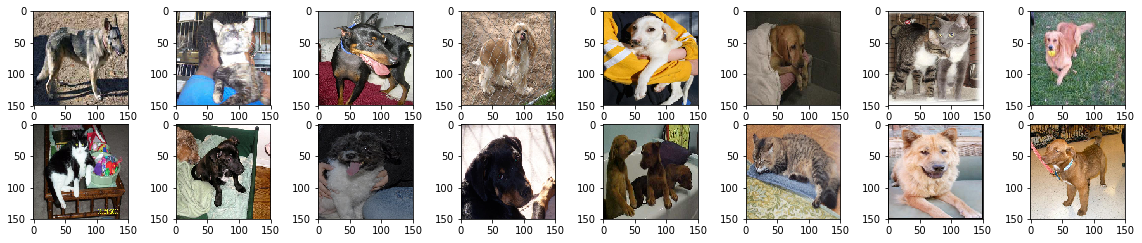

In [37]:
# Print example and its predicted class
plt.figure(figsize=(20,8))
i = 0
for image in sample:
    plt.subplot(4,8,i+1)
    plt.imshow(image)
    i += 1
    if 15 < i: break
plt.show()